# Convolutional fillters for edge detections applied to faces
---

Play with the differents filters, getting some edge detections and finally used to detect some faces ussing pre trained models of HaarCascade


Table of content

* [Fourier Transforms](#section1)
* [Creating a Filter, Edge Detection](#section2)
* [Gaussian Blur, Medical Images](#section3)
* [High and Low Pass Filters](#section4)
* [Canny edge detection](#section5)
* [Hough Transform](#section6)
* [Face detection with Haar Cascade](#section7)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

<a id='section1'></a>
### Fourier Transforms

The frequency components of an image can be displayed after doing a Fourier Transform (FT). An FT looks at the components of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum.

In fact, an FT treats patterns of intensity in an image as sine waves with a particular frequency, and you can look at an interesting visualization of these sine wave components [on this page](https://plus.maths.org/content/fourier-transforms-images).

In this notebook, we'll first look at a few simple image patterns to build up an idea of what image frequency components look like, and then transform a more complex image to see what it looks like in the frequency domain.

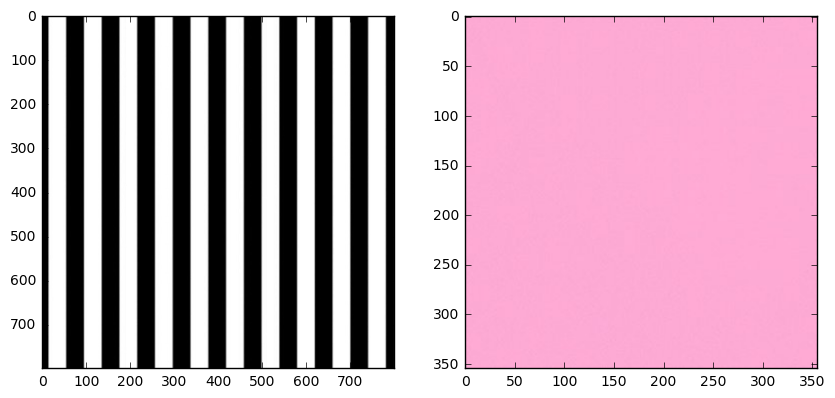

In [4]:
# Read in the images and change color to RGB (from BGR)
image_stripes = cv2.imread('data/edges_and_faces/stripes.jpg')
image_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2RGB)

# Read in the images and change color to RGB (from BGR)
image_solid = cv2.imread('data/edges_and_faces/pink_solid.jpg')
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(image_stripes)
ax2.imshow(image_solid)

In [3]:
# convert to grayscale to focus on the intensity patterns in the image
gray_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(image_solid, cv2.COLOR_RGB2GRAY)

# normalize the image color values from a range of [0,255] to [0,1] for further processing
norm_stripes = gray_stripes/255.0
norm_solid = gray_solid/255.0

# perform a fast fourier transform and create a scaled, frequency transform image
def ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    
    return frequency_tx


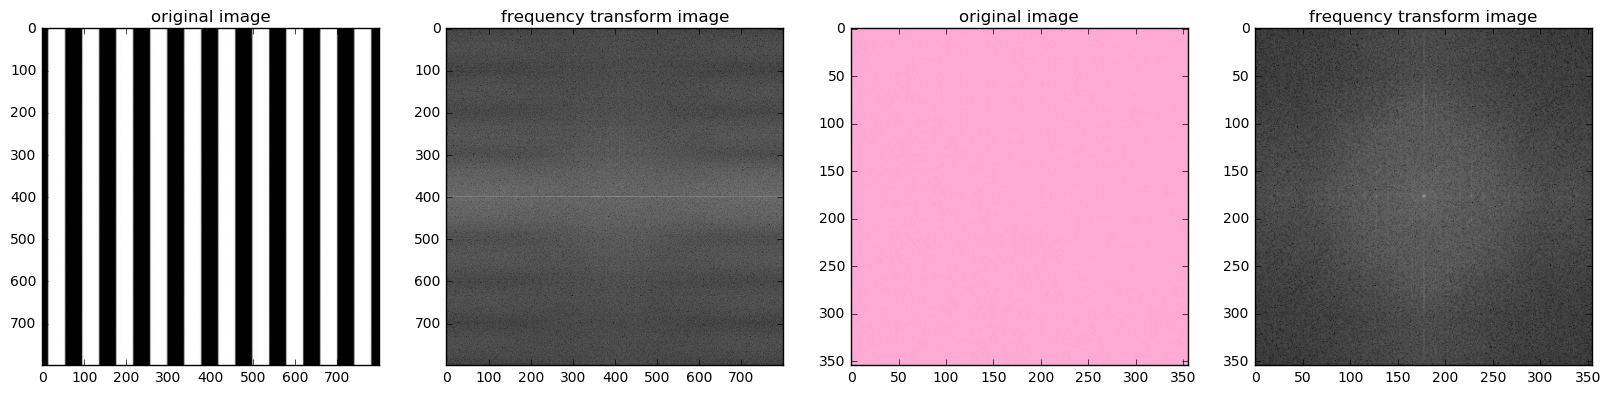

In [4]:
# Call the function on the normalized images
# and display the transforms
f_stripes = ft_image(norm_stripes)
f_solid = ft_image(norm_solid)

# display the images
# original images to the left of their frequency transform
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('original image')
ax1.imshow(image_stripes)
ax2.set_title('frequency transform image')
ax2.imshow(f_stripes, cmap='gray')

ax3.set_title('original image')
ax3.imshow(image_solid)
ax4.set_title('frequency transform image')
ax4.imshow(f_solid, cmap='gray')


Low frequencies are at the center of the frequency transform image. 

The transform images for these example show that the solid image has most low-frequency components (as seen by the center bright spot). 

The stripes tranform image contains low-frequencies for the areas of white and black color and high frequencies for the edges in between those colors. The stripes transform image also tells us that there is one dominating direction for these frequencies; vertical stripes are represented by a horizontal line passing through the center of the frequency transform image.

Next, let's see what this looks like applied to a real-world image.

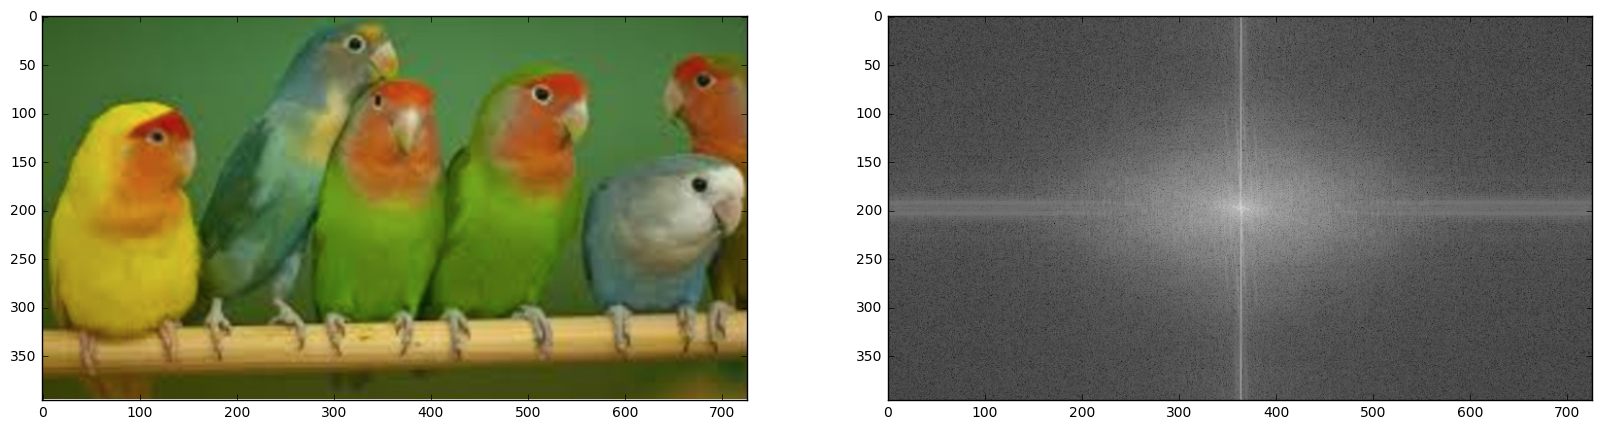

In [5]:
# Read in the images and change color to RGB (from BGR)
image = cv2.imread('data/edges_and_faces/birds.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# normalize the image
norm_image = gray/255.0

f_image = ft_image(norm_image)

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax2.imshow(f_image, cmap='gray')

Notice that this image has components of all frequencies. You can see a bright spot in the center of the transform image, which tells us that a large portion of the image is low-frequency; this makes sense since the body of the birds and background are solid colors. The transform image also tells us that there are **two** dominating directions for these frequencies; vertical edges (from the edges of birds) are represented by a horizontal line passing through the center of the frequency transform image, and horizontal edges (from the branch and tops of the birds' heads) are represented by a vertical line passing through the center.

---

<a id='section2'></a>
### Creating a Filter, Edge Detection

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="data/edges_and_faces/sobel_ops.png" width=200 height=200>

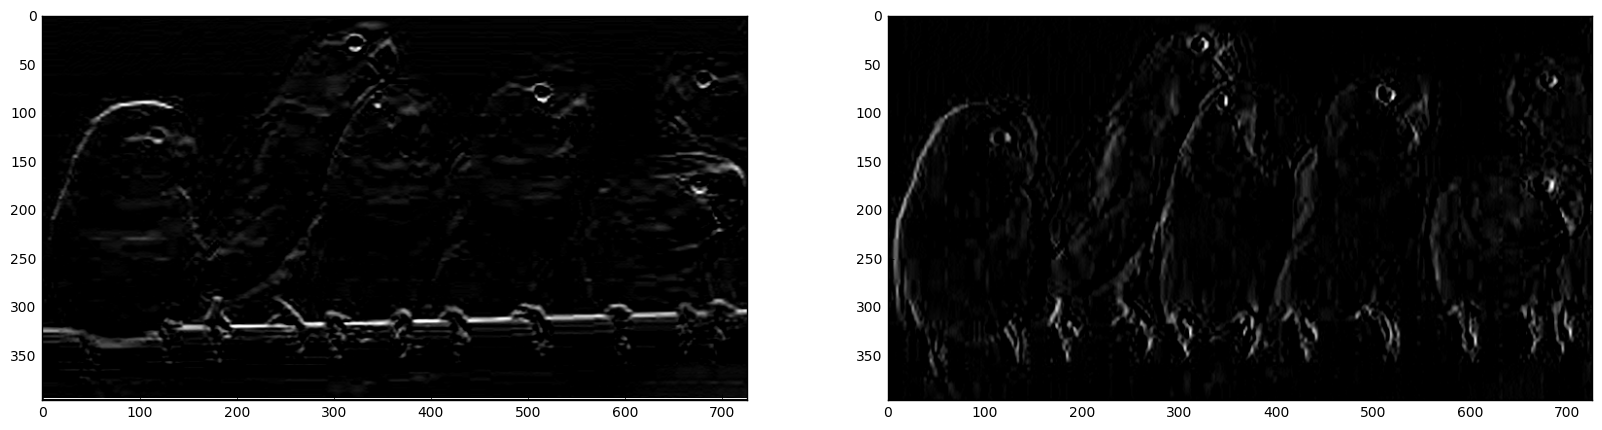

In [6]:
# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_y = cv2.filter2D(gray, -1, sobel_y)
filtered_image_x = cv2.filter2D(gray, -1, sobel_x)

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(filtered_image_y, cmap='gray')
ax2.imshow(filtered_image_x, cmap='gray')

<a id='section3'></a>
### Gaussian Blur, Medical Images

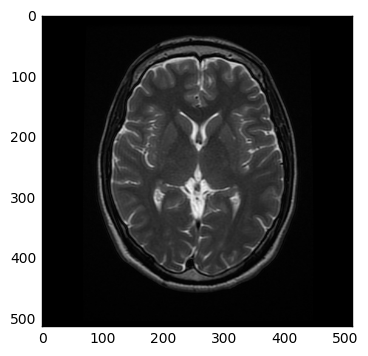

In [7]:
# Read in the image
image = cv2.imread('data/edges_and_faces/brain_MR.jpg')

# Make a copy of the image and hange color to RGB (from BGR)
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

#### Gaussian blur the image

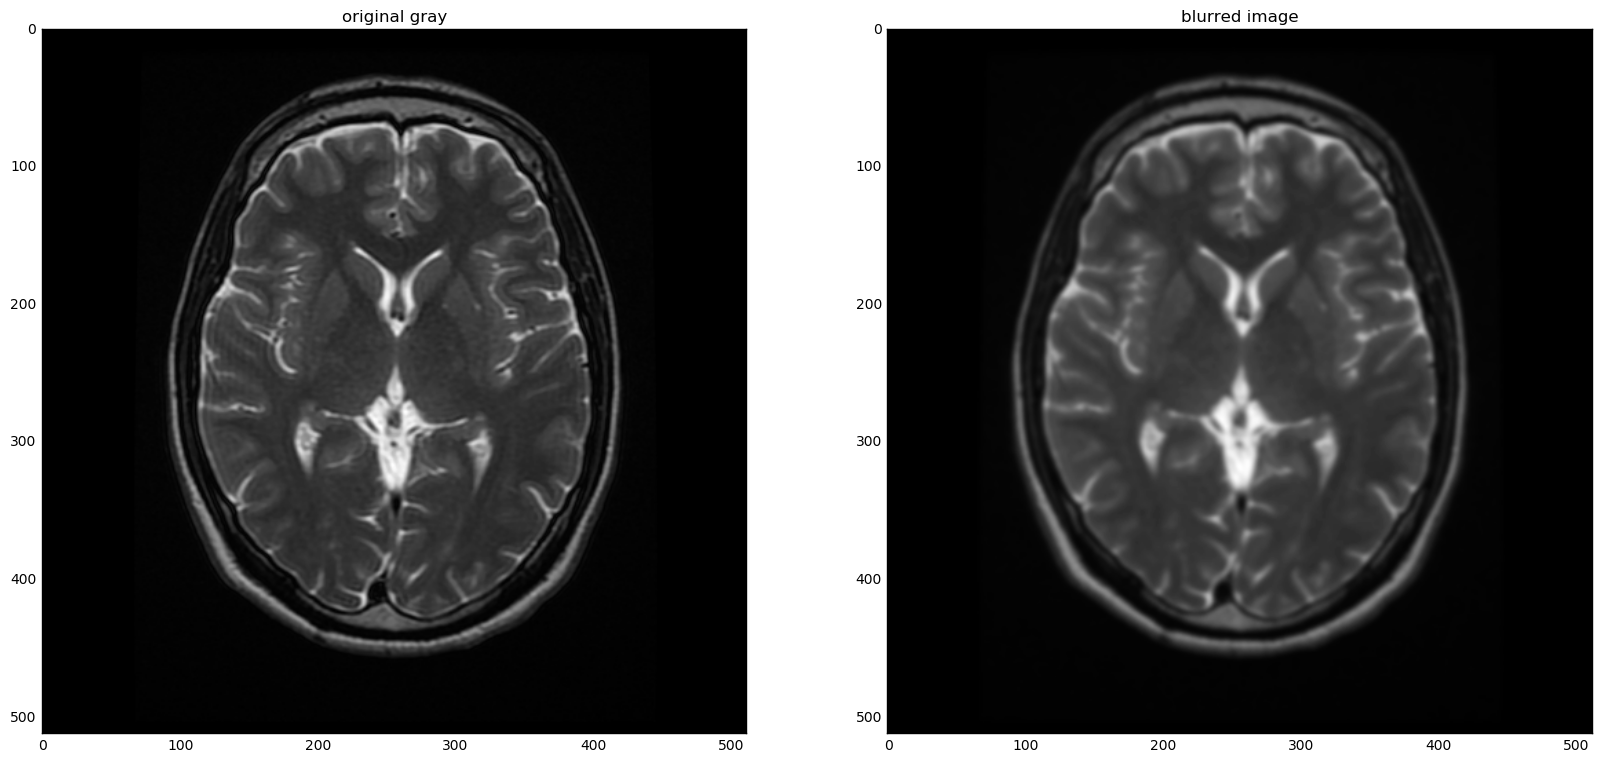

In [8]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Create a Gaussian blurred image
gray_blur = cv2.GaussianBlur(gray, (9, 9), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(gray_blur, cmap='gray')

#### Test performance with a high-pass filter


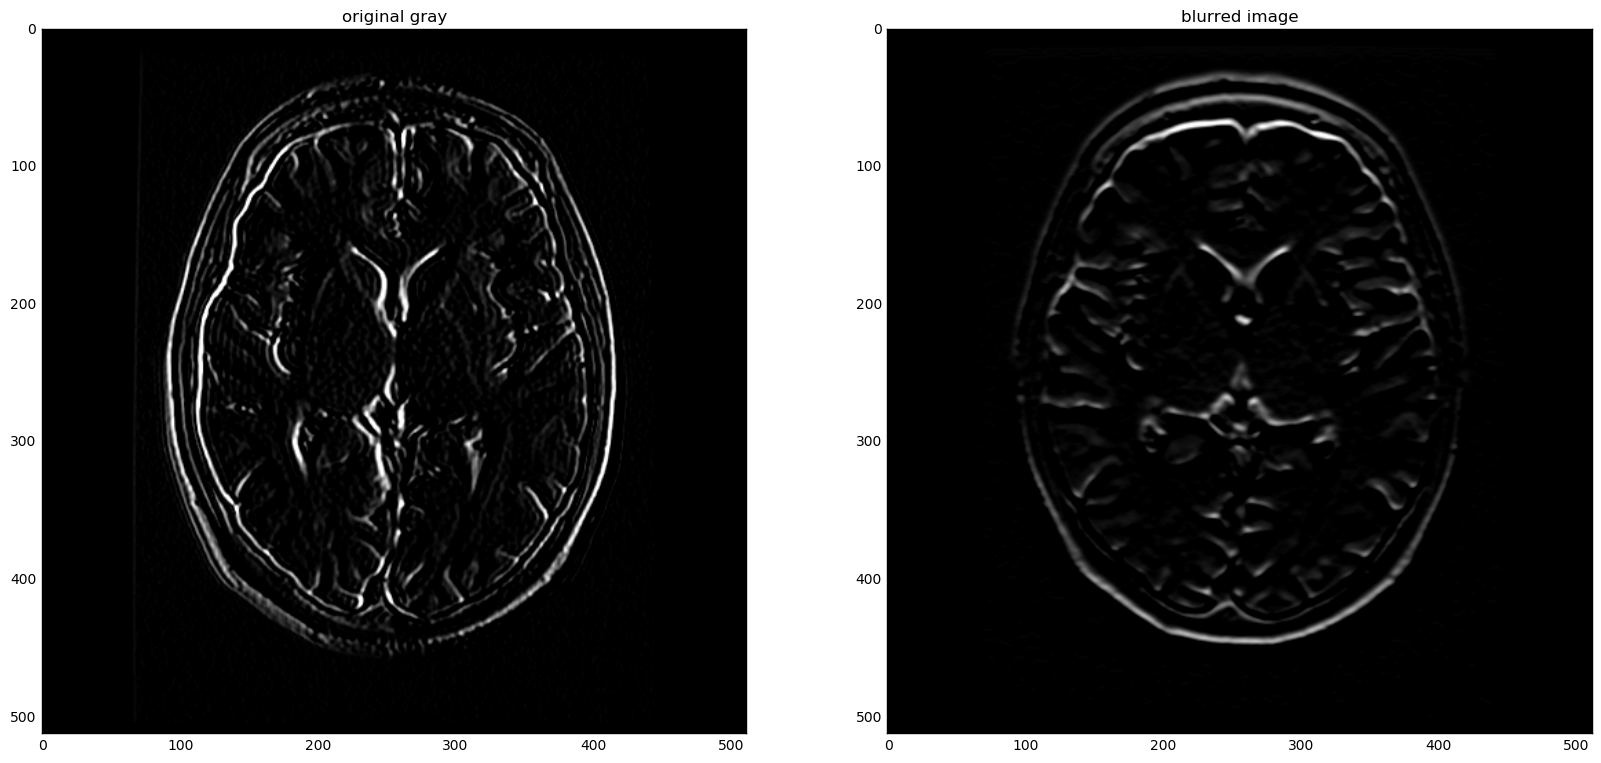

In [9]:
# High-pass filter with sobel filters

# Filter the orginal and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray, -1, sobel_x)

filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_y)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')

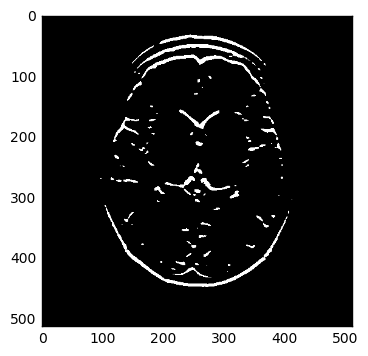

In [10]:
# Create threshold that sets all the filtered pixels to white
# Above a certain threshold
retval, binary_image = cv2.threshold(filtered_blurred, 50, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')

<a id='section4'></a>
### High and Low Pass Filters


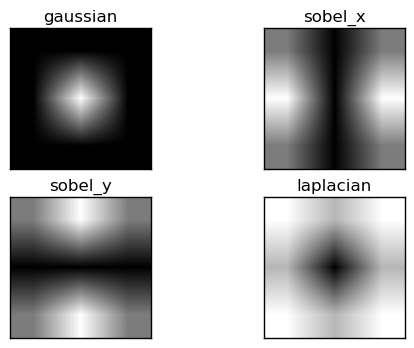

In [11]:
# Define gaussian, and laplacian (edge) filters adding to the sobel x and y already created

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])


filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x', \
                'sobel_y', 'laplacian']

# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

<a id='section5'></a>
### Implement Canny edge detection


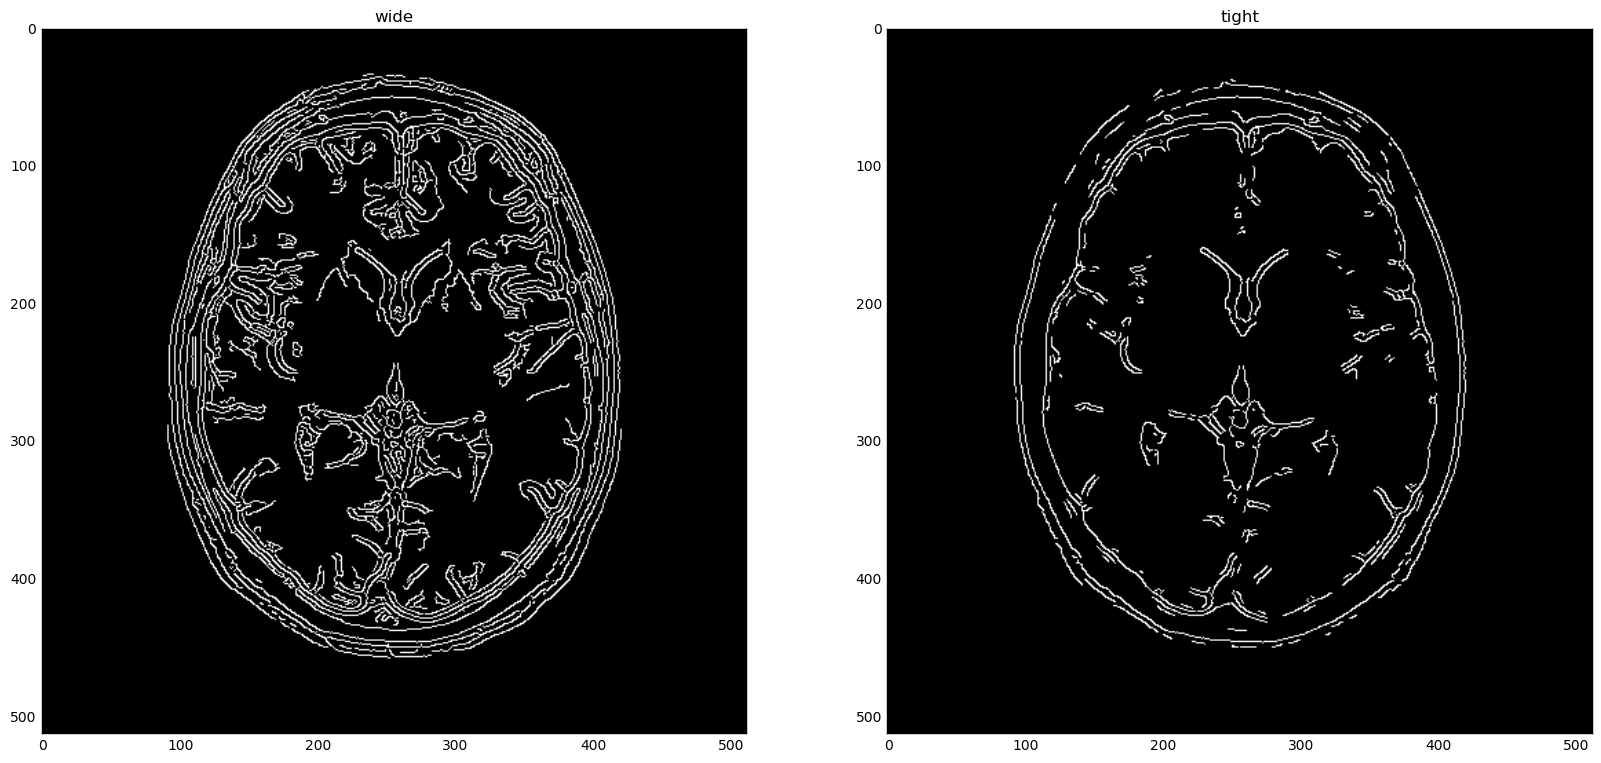

In [12]:
# Try Canny using "wide" and "tight" thresholds
wide = cv2.Canny(gray, 30, 100)
tight = cv2.Canny(gray, 200, 240)
    
# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')

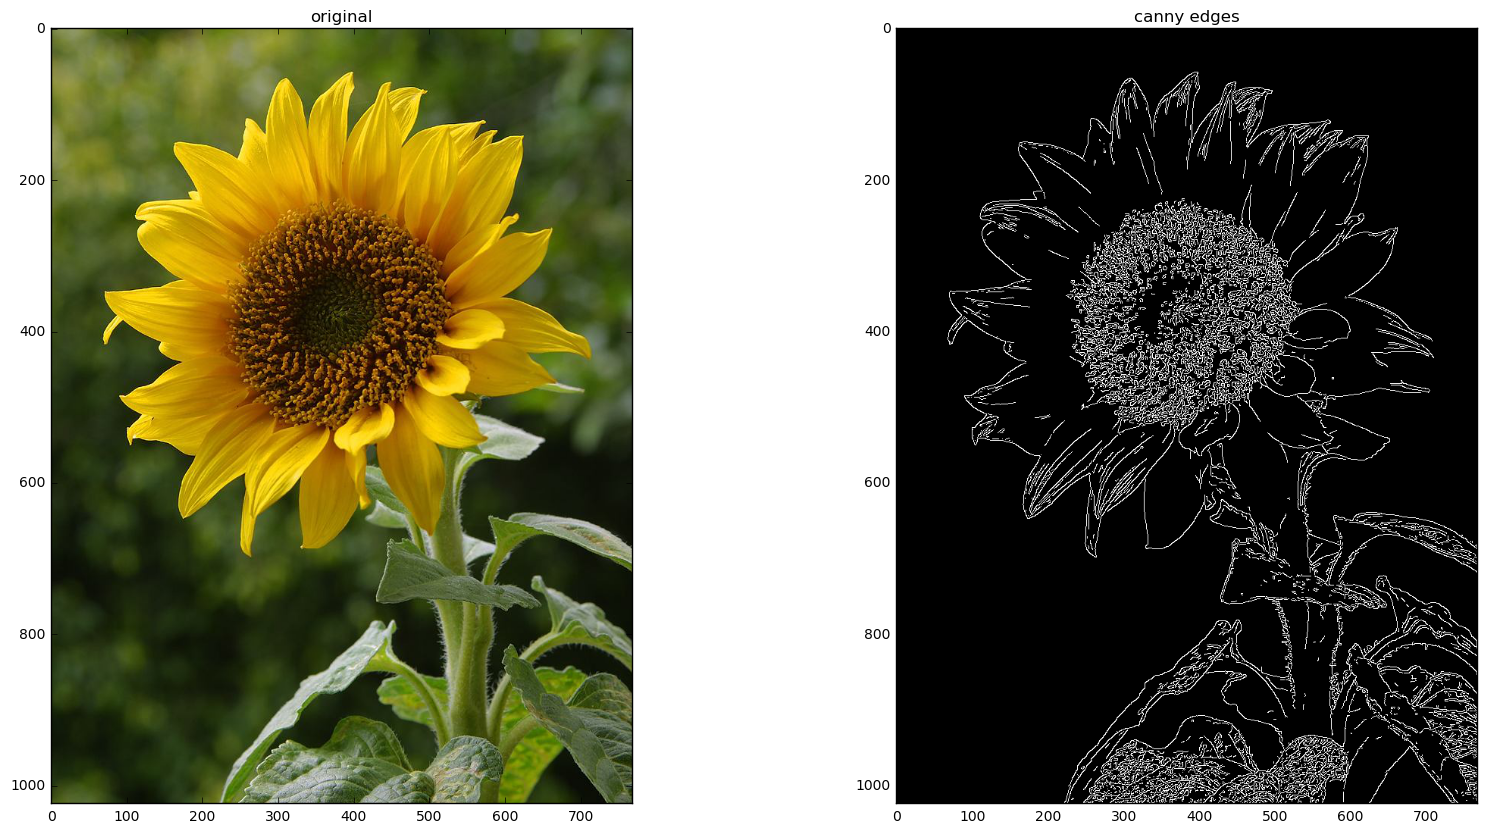

In [16]:
# Read in the image and change color to RGB (from BGR)
image = cv2.imread('data/edges_and_faces/sunflower.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# play with this thresholds and see the edge detection output
lower = 100
upper = 150
edges = cv2.Canny(gray, lower, upper)

# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('original')
ax1.imshow(image)
ax2.set_title('canny edges')
ax2.imshow(edges, cmap='gray')

<a id='section6'></a>
### Hough Transform

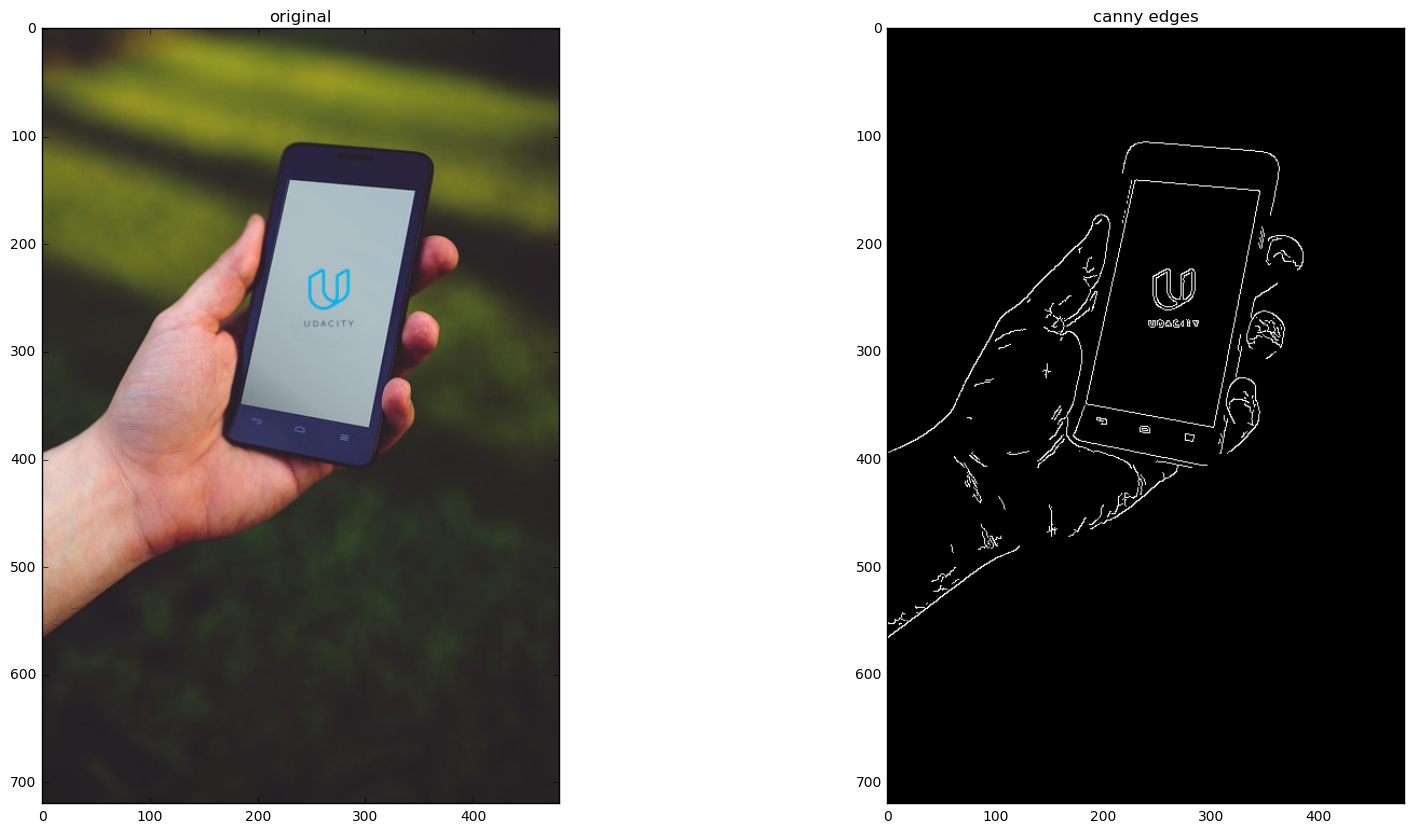

In [20]:
# Read in the image and change color to RGB (from BGR)
image = cv2.imread('data/edges_and_faces/phone.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define our parameters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('original')
ax1.imshow(image)
ax2.set_title('canny edges')
ax2.imshow(edges, cmap='gray')

#### Hough Lines

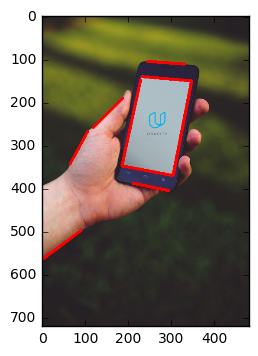

In [21]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 50
max_line_gap = 5

line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)

#### Hough Circles
#### HoughCircles function

`HoughCircles` takes in a few things as its arguments:
* an input image, detection method (Hough gradient), resolution factor between the detection and image (1),
* minDist - the minimum distance between circles
* param1 - the higher value for performing Canny edge detection
* param2 - threshold for circle detection, a smaller value --> more circles will be detected
* min/max radius for detected circles

The variable you should change will be the last two: min/max radius for detected circles. Take a look at the image above and estimate how many pixels the average circle is in diameter; use this estimate to provide values for min/max arguments. You may also want to see what happens if you change minDist.

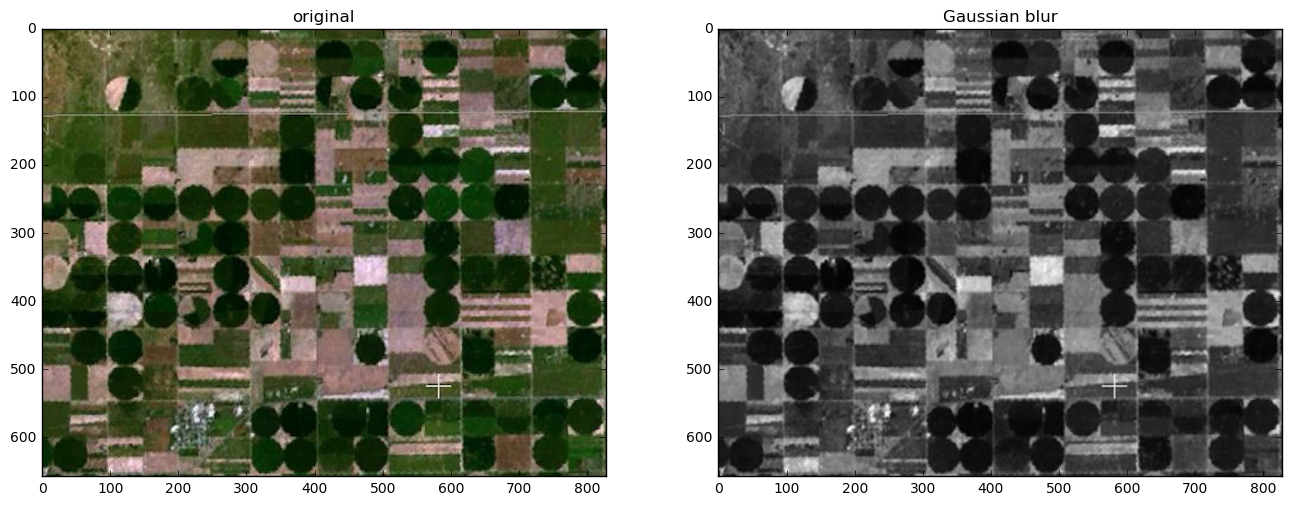

In [24]:
# Read in the image and change color to RGB (from BGR)
image = cv2.imread('data/edges_and_faces/round_farms.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Gray and blur
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)

# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.set_title('original')
ax1.imshow(image)
ax2.set_title('Gaussian blur')
ax2.imshow(gray_blur, cmap='gray')


Circles shape:  (1, 172, 3)


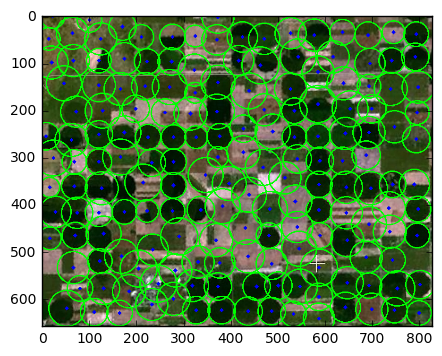

In [25]:
# for drawing circles on
circles_im = np.copy(image)

# right now there are too many, large circles being detected
# try changing the value of maxRadius, minRadius, and minDist
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 
                           minDist=45,
                           param1=70,
                           param2=11,
                           minRadius=20,
                           maxRadius=40)

# convert circles into expected type
circles = np.uint16(np.around(circles))
# draw each one
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(circles_im)

print('Circles shape: ', circles.shape)
    

<a id='section7'></a>
### Face detection with Haar Cascade

#### Face detection using OpenCV

One older (from around 2001), but still popular scheme for face detection is a Haar cascade classifier; these classifiers in the OpenCV library and use feature-based classification cascades that learn to isolate and detect faces in an image. You can read [the original paper proposing this approach here](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf).

Let's see how face detection works on an exampe in this notebook.

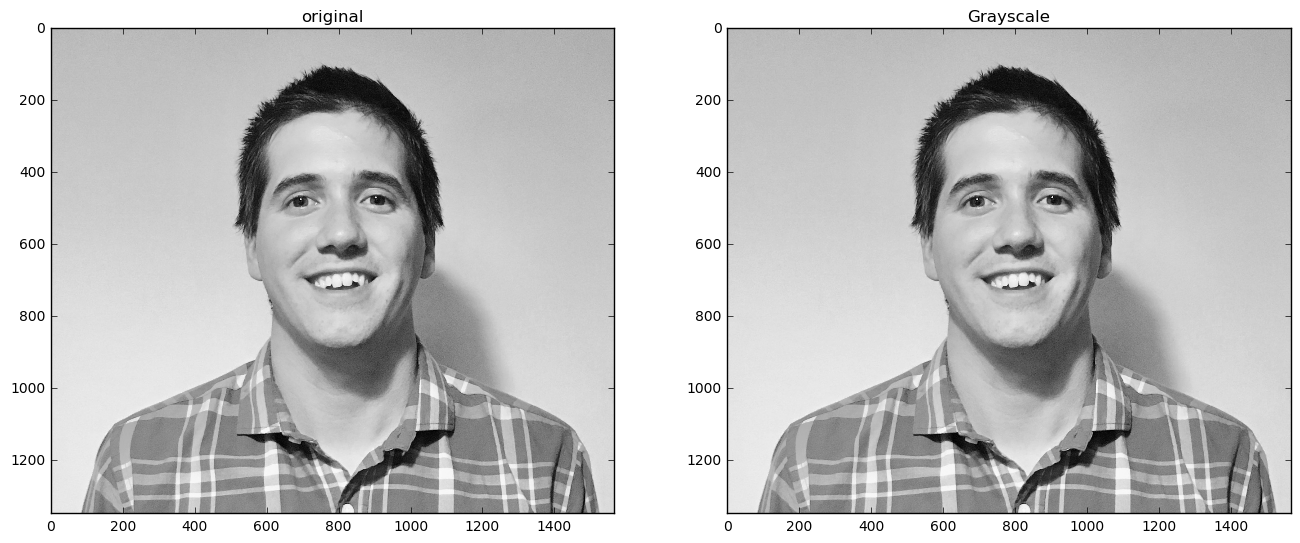

In [24]:
# load in color image for face detection, convert to RBG and grayscale
image = cv2.imread('data/carne_liga.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  

# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.set_title('original')
ax1.imshow(image)
ax2.set_title('Grayscale')
ax2.imshow(gray, cmap='gray')

Next we load in the fully trained architecture of the face detector, found in the file `detector_architectures/ haarcascade_frontalface_default.xml`,and use it on our image to find faces!

**A note on parameters** 

How many faces are detected is determined by the function, `detectMultiScale` which aims to detect faces of varying sizes. The inputs to this function are: `(image, scaleFactor, minNeighbors)`; you will often detect more faces with a smaller scaleFactor, and lower value for minNeighbors, but raising these values often produces better matches. Modify these values depending on your input image.

In [32]:
# load in cascade classifier
face_cascade = cv2.CascadeClassifier('data/detector_architectures/haarcascade_frontalface_default.xml')

# run the detector on the grayscale image
faces = face_cascade.detectMultiScale(gray, 2, 4)

In [33]:
# print out the detections found
print ('We found ' + str(len(faces)) + ' faces in this image')
print ("Their coordinates and lengths/widths are as follows")
print ('=============================')
print (faces)

We found 1 faces in this image
Their coordinates and lengths/widths are as follows
[[420 164 768 768]]


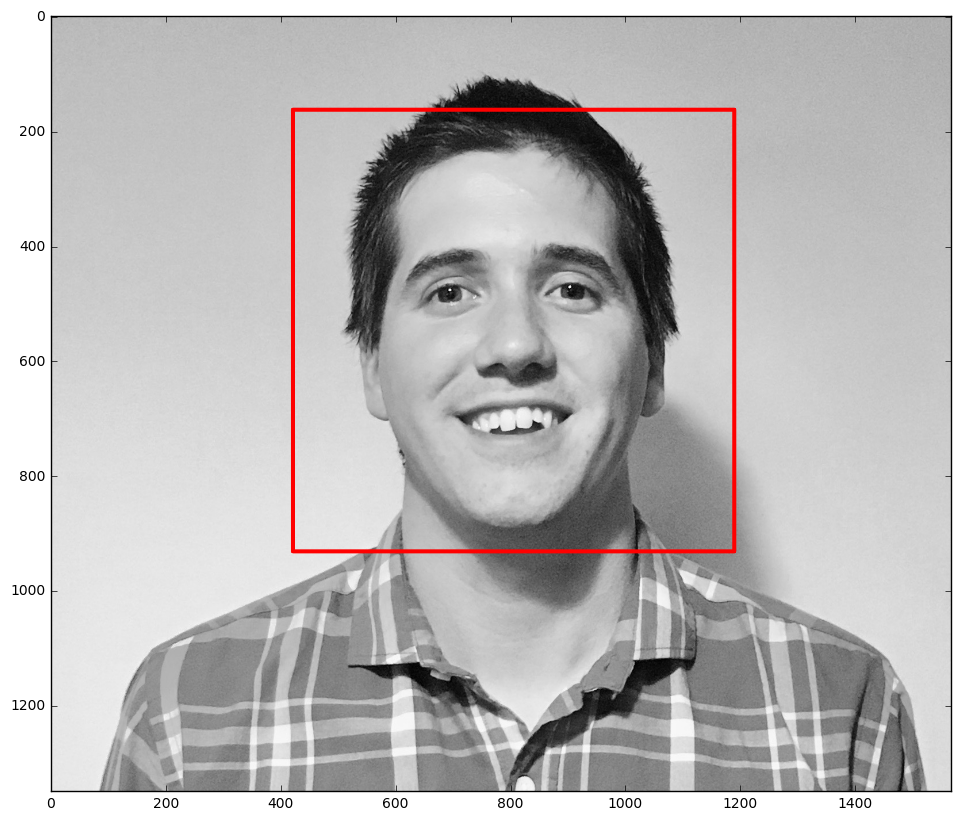

In [34]:
img_with_detections = np.copy(image)   # make a copy of the original image to plot rectangle detections ontop of

# loop over our detections and draw their corresponding boxes on top of our original image
for (x,y,w,h) in faces:
    # draw next detection as a red rectangle on top of the original image.  
    # Note: the fourth element (255,0,0) determines the color of the rectangle, 
    # and the final argument (here set to 5) determines the width of the drawn rectangle
    cv2.rectangle(img_with_detections,(x,y),(x+w,y+h),(255,0,0),5)  

# display the result
plt.figure(figsize=(20,10))
plt.imshow(img_with_detections)